# Quantum Machine Learning: A Simple Classifier

This notebook builds a Quantum Support Vector Machine (QSVM) to classify a simple 2D dataset. It uses Qiskit Machine Learning's built-in `ad_hoc_data` for demonstration.

In [1]:

!pip install qiskit
!pip install qiskit-machine-learning
!pip install qiskit-algorithms

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
   ------------------- -------------------- 3.1/6.5 MB 15.3 MB/s eta 0:00:01
   -------------------------------- ------- 5.2/6.5 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 6.5/6.5 MB 11.0 MB/s  0:00:00
   ---------------------------------------- 0.0/17.8 MB ? eta -:--:--
   -- ------------------------------------- 1.0/17.8 MB 49.2 MB/s eta 0:00:01
   ---- ----------------------------------- 1.8/17.8 MB 3.9 MB/s eta 0:00:05
   --------- ------------------------------ 4.2/17.8 MB 6.4 MB/s eta 0:00:03
   -------------- ------------------------- 6.3/17.8 MB 7.7 MB/s eta 0:00:02
   ------------------ --------------------- 8.4/17.8 MB 8.5 MB/s eta 0:00:02
   ------------------------- -------------- 11.5/17.8 MB 9.2 MB/s eta 0:00:01
   ---------------------------- ----------- 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel 
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data

## Part 1: Loading the Data

We'll use the `ad_hoc_data` function, which is a simple, non-linearly separable dataset perfect for testing quantum kernels. We'll generate training and testing sets and plot them.

In [19]:
TRAIN_SIZE = 20
TEST_SIZE = 10
N_DIMENSIONS = 2


In [18]:
training_features = training_features.reshape(-1, N_DIMENSIONS)
test_features = test_features.reshape(-1, N_DIMENSIONS)


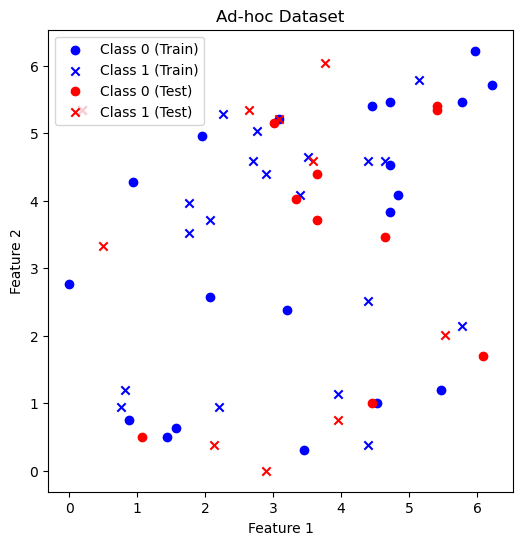

In [ ]:

training_labels = training_labels[:len(training_features)]
test_labels = test_labels[:len(test_features)]


plt.figure(figsize=(6, 6))
plt.scatter(training_features[training_labels == 0][:, 0], training_features[training_labels == 0][:, 1],
            c='b', marker='o', label="Class 0 (Train)")
plt.scatter(training_features[training_labels == 1][:, 0], training_features[training_labels == 1][:, 1],
            c='b', marker='x', label="Class 1 (Train)")
plt.scatter(test_features[test_labels == 0][:, 0], test_features[test_labels == 0][:, 1],
            c='r', marker='o', label="Class 0 (Test)")
plt.scatter(test_features[test_labels == 1][:, 0], test_features[test_labels == 1][:, 1],
            c='r', marker='x', label="Class 1 (Test)")

plt.title("Ad-hoc Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Part 2: Building the Quantum Classifier

We will use a `QSVC` (Quantum Support Vector Classifier) which uses a quantum kernel. The "kernel" is just a way of mapping our classical data into a quantum feature space, where it might be easier to separate.

We'll use the `ZZFeatureMap` as our kernel.

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVC

try:
    from qiskit_aer.primitives import SamplerV2
except ImportError:
    from qiskit.primitives import SamplerV2

N_DIMENSIONS = training_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=N_DIMENSIONS, reps=2, entanglement='linear').decompose()

fidelity = ComputeUncompute(sampler=SamplerV2(), shots=None)

quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

clf = SVC(kernel=lambda X, Y: quantum_kernel.evaluate(X, Y))
clf.fit(training_features, training_labels)
preds = clf.predict(test_features)

## Part 3: Evaluate the Model
Now, let's see how well our quantum classifier performs on the new (red) test data.

In [ ]:

score = clf.score(test_features, test_labels)


print(f"QSVC accuracy on the test set: {score * 100:.2f}%")

predictions = clf.predict(test_features)
print(f"Predictions: {predictions}")
print(f"Actual Labels: {test_labels}")

QSVC accuracy on the test set: 40.00%
Predictions: [1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Actual Labels: [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
